# Nonhardening Plasticity

## Overview

In contrast to elasticity, plasticity describes the deformation of bodies that undergo nonreversible changes of shape in response to applied load.  When a body transitions from elastic to plastic deformation it is said to "yield".  The yield transition point, also known as the **yield strength** is a property of the material and generally changes in response to continued loading.  When the yield strength increases with continued loading it is said to *harden* and the response is described by hardening theories of plasticity.  The simplified nonhardening theory of plasticity describes materials whose yield strength does not change in response to continued loading.  This notebook

- presents an introduction to nonhardening plasticity,
- implements a nonhardening "$J_2$" plasticity model in Matmodlab, and
- verifies the $J_2$ model against analytic solutions.

## See Also

- [User Defined Materials: Introduction](UserMaterials.ipynb)
- [Linear Elastic Material](LinearElastic.ipynb)

<a name='contents'></a>
## Contents

1. <a href='#plastic'>Fundamental Equations</a>
2. <a href='#j2'>$J_2$ Plasticity</a>
3. <a href='#umat.std'>Standard Model Implementation</a>
4. <a href='#umat.ver'>Model Verification</a>

<a name='plastic'></a>
## Fundamental Equations

The mechanical response of a nonhardening plastic material is predicated on the assumption that there exists an **elastic limit**, beyond which stress states are not achievable through normal processes.  The elastic limit is defined by a **yield surface** satisfying

$$
f\left(\pmb{\sigma}\right) = 0
$$

where $f$ is the **yield function** and $\pmb{\sigma}$ the mechanical stress, defined as

$$
\dot{\pmb{\sigma}} = \mathbb{C}{:}\dot{\pmb{\epsilon}}^{\rm e}
$$

where $\mathbb{C}$ is the elastic stiffness and $\dot{\pmb{\epsilon}}^{\rm e}$ the rate of elastic strain.  The rate of strain is commonly regarded as the sum of elastic and plastic parts, giving for the mechanical response

$$
\dot{\pmb{\sigma}} = \mathbb{C}{:}\left(\dot{\pmb{\epsilon}} - \dot{\pmb{\epsilon}}^{\rm p}\right)
$$

where $\dot{\pmb{\epsilon}}^{\rm p}$ is the rate of plastic strain.  Replacing $\dot{\pmb{\epsilon}}^{\rm p}$ with $\dot{\lambda}\pmb{m}$, $\dot{\lambda}$ being the magnitude of $\dot{\pmb{\epsilon}}^{\rm p}$ and $\pmb{m}$ its direction, the mechanical response of the material is

$$
\dot{\pmb{\sigma}} = \mathbb{C}{:}\left(\dot{\pmb{\epsilon}} - \dot{\lambda}\pmb{m}\right)
$$

The solution to the plasticity problem is reduced to determining $\dot{\lambda}$ such that $f\left(\pmb{\sigma}(t)\right)\leq 0 \ \forall t>0$

### Solution Process

Given the current state of stress $\pmb{\sigma}_n$, the solution to the plasticity problem begins with the hypothesis that the entire strain increment is elastic:

$$
\pmb{\sigma}_{n+1} \stackrel{?}{=} \pmb{\sigma}_{n} + \mathbb{C}{:}\dot{\pmb{\epsilon}}dt = \pmb{\sigma}^{\rm test}
$$

where the descriptor "test" is used to signal the fact that at this point $\pmb{\sigma}^{\rm test}$ is merely a hypothesized solution.  The hypothesis is validated if $\pmb{\sigma}^{\rm test}$ satisfies the **yield condition** 

$$f\left(\pmb{\sigma}^{\rm test}\right)\leq 0$$

so that $\pmb{\sigma}_{n+1}=\pmb{\sigma}^{\rm test}$.  

If instead the hypothesis is *falsefied*, i.e., the predicted test stress falls outside of the yield surface defined by $f=0$, the plasticity problem, 

$$\begin{align}
\pmb{\sigma}_{n+1} = \pmb{\sigma}_{n} + \mathbb{C}{:}\left(\dot{\pmb{\epsilon}} - \dot{\lambda}\pmb{m}\right)dt &= \pmb{\sigma}^{\rm trial} - \dot{\lambda}\pmb{A}dt\\
f\left(\pmb{\sigma}^{\rm trial} - \dot{\lambda}\pmb{A}dt\right) &= 0
\end{align}$$

where $\pmb{A}=\mathbb{C}{:}\pmb{m}$, is solved.  $\dot{\pmb{\sigma}}^{\rm trial}=\mathbb{C}{:}\dot{\pmb{\epsilon}}$ is distinguished from $\dot{\pmb{\sigma}}^{\rm test}$ in that for stress driven problems $\dot{\pmb{\sigma}}^{\rm trial}$ is not necessarily known because the strain rates $\dot{\epsilon}$ are not known.

The unknown scalar $\dot{\lambda}$ is determined by noting the following observation: if $f\left(\pmb{\sigma}_{n}\right)=0$ and, after continued loading, $f\left(\pmb{\sigma}_{n+1}\right)=0$, the rate of change of $f$ itself must be zero.  Thus, by the chain rule,

$$\begin{align}
\dot{f}{\left(\pmb{\sigma}\right)}
    &=\frac{df}{d\pmb{\sigma}}{:}\dot{\pmb{\sigma}}\\
     &=\frac{df}{d\pmb{\sigma}}{:}\left(\mathbb{C}{:}\dot{\epsilon}-\dot{\lambda}\pmb{A}dt\right)=0
\end{align}$$

which is known as the **consistency condition** and $\dot{\lambda}$ the **consistency parameter**.  The consistency condition is equivalent to the statement that $\dot{\lambda}\dot{f}=0$.  The consistency conditions can be shown to be equivalent to the Karush-Kuhn-Tucker conditions

$$
   \dot{\lambda} \ge 0 ~,~~ f \le 0~,~~ \dot{\lambda}\,f = 0 \,.
$$

Letting

$$
\pmb{n} = \frac{df}{d\pmb{\sigma}}\Big/\Big\lVert\frac{df}{d\pmb{\sigma}}\Big\rVert
$$

the preceding equation can be solved $\dot{\lambda}$, giving

$$
\dot{\lambda} 
   = \frac{\pmb{n}{:}\mathbb{C}{:}\dot{\epsilon}}{\pmb{n}{:}\pmb{A}}
$$

Substituting $\dot{\lambda}$ in to the expression for stress rate gives

$$\begin{align}
\dot{\pmb{\sigma}} 
   &= \mathbb{C}{:}\dot{\pmb{\epsilon}} - \frac{\pmb{n}{:}\mathbb{C}{:}\dot{\epsilon}}{\pmb{n}{:}\pmb{A}}\pmb{A}\\
   &= \mathbb{C}{:}\dot{\pmb{\epsilon}} - \frac{1}{\pmb{n}{:}\pmb{A}}\pmb{Q}\pmb{A}{:}\dot{\pmb{\epsilon}}\\
   &= \mathbb{D}{:}\dot{\pmb{\epsilon}}
\end{align}$$

where

$$
\mathbb{D} = \mathbb{C} - \frac{1}{\pmb{n}{:}\pmb{A}}\pmb{Q}\pmb{A}
$$

The stress rate is then integrated through time to determine $\pmb{\sigma}$

### Integration Procedure

It can be shown that there exists a scalar $\Gamma$ such that

$$\pmb{\sigma}_{n+1} = \pmb{\sigma}^{\rm trial} - \Gamma\pmb{A}$$

$\Gamma$ is determined by satisfying the yield condition.  In other words, $\Gamma$ is the solution to

$$f\left(\pmb{\sigma}^{\rm trial} - \Gamma\pmb{A}\right)=0$$

The unknown $\Gamma$ is found such that $f\left(\pmb{\sigma}(\Gamma)\right)=0$.  The solution can be found by solving the preceding equation iteratively by applying Newton's method so that

$$
\Gamma^{i+1} = \Gamma^i + \frac{f\left(\pmb{\sigma}(\Gamma^{n})\right)}{(df/d\pmb{\sigma})\big|_{\Gamma^i}{:}\pmb{A}}
$$

When $\Gamma^{i+1}-\Gamma^i<\epsilon$, where $\epsilon$ is a small number, the iterations are complete and the updated stress can be determined.

Note that the scalar $\Gamma$ is also equal to $\Gamma=\dot{\lambda}dt$, but since $\dot{\lambda}=0$ for elastic loading, $\Gamma=\dot{\lambda}dt^p$, where $dt^p$ is the plastic part of the time step.  This gives $\Gamma$ the following physical interpretation: it is the magnigute of the total plastic strain increment.

#### Alternative Iterative method

Brannon argues that redefining $\Gamma$ such that

$$\pmb{\sigma}_{n+1} = \pmb{\sigma}^{\rm trial} + \Gamma\pmb{A}$$

can lead to fast convergence for yield surfaces with considerable curvature [2002, Radial Return document].  To update the stress, begin Newton iterations with $\Gamma=0$ and compute the improved estimate as

$$
\Gamma^{i+1} = -\frac{f\left(\pmb{\sigma}(\Gamma^{i})\right)}{(df/d\pmb{\sigma})\big|_{\Gamma^i}{:}\pmb{A}}
$$

when $\Gamma^{i+1}<\epsilon$ the Newton procedure is complete.

## $J_2$ Plasticity

The equations developed thus far are general in the sense that they apply to any material that can be modeled by nonhardening plasticity.  The equations are now specialized to the case of isotropic hypoelasticity and $J_2$ plasticity by defining

$$\begin{align}
\dot{\pmb{\sigma}} &= 3K\,\mathrm{iso}\dot{\pmb{\epsilon}}^{\rm e} + 2G\,\mathrm{dev}\dot{\pmb{\epsilon}}^{\rm e} \\
f\left(\pmb{\sigma}\right) &= \sqrt{J_2} - k
\end{align}
$$

where $K$ and $G$ are the bulk and shear moduli, respectively, and $J_2$ is the second invariant of the stress deviator, defined as

$$J_2 = \frac{1}{2}\pmb{s}{:}\pmb{s}, \quad \pmb{s} = \pmb{\sigma} - \frac{1}{3}\mathrm{tr}\left(\pmb{\sigma}\right)\pmb{I}$$

Additionally, we adopt the assumption of an **associative flow rule** wherein $\pmb{m}=\pmb{n}$.  Accordingly,

$$\begin{align}
\frac{df}{d\pmb{\sigma}}&=\frac{1}{2\sqrt{J_2}}\pmb{s}, &\pmb{n}=\frac{1}{\sqrt{2J_2}}\pmb{s} \\
\pmb{A}&=\frac{2G}{\sqrt{2J_2}}\pmb{s}, &\pmb{Q}=\frac{2G}{\sqrt{2J_2}}\pmb{s}
\end{align}$$

### Required Parameters

The model as described above requires at minimum 3 parameters: 2 independent elastic moduli and a yield strength measure.  Commonly, the yield strength in tension $Y$ is chosen in lieu of the yield strength in shear $k$.  The conversion from $Y$ to $k$, as required by the model development, is found from evaluating the yield criterion for the case of uniaxial tension, where the stress and its deviator are

$$
\pmb{\sigma} =  \begin{bmatrix}\sigma_{\rm ax}&&\\& 0&\\&& 0\end{bmatrix}, \quad
\pmb{s} =  \frac{1}{3}\begin{bmatrix}2\sigma_{\rm ax}&&\\& -\sigma_{\rm ax}&\\&& -\sigma_{\rm ax}\end{bmatrix}
$$

Accordingly, 

$$J_2 = \frac{1}{2}\pmb{s}{:}\pmb{s} = \frac{1}{3}\sigma_{\rm ax}^2$$

evaluating the yield function leads to

$$\sqrt{J_2} = \frac{1}{\sqrt{3}}Y = k$$

### Optional Solution Dependent Variables

The simple $J_2$ plasticity model described does not require the storage and tracking of solution dependent variables.  However, the equivalent plastic strain is often stored for output purposes.  The equivalent plastic strain is defined so that the plastic work

$$W^p = \pmb{\sigma}{:}\dot{\pmb{\epsilon}}^p=\sigma_{eq}\dot{\epsilon}^p_{eq}$$

where $\sigma_{eq}$ is the equivalent von Mises stress $\sigma_{eq} = \sqrt{\frac{3}{2}\pmb{s}{:}\pmb{s}}$,  requiring that

$$\dot{\epsilon}^p_{eq} = \sqrt{\frac{2}{3}}\lVert{\rm dev}\left(\dot{\pmb{\epsilon}}^p\right)\rVert$$

<a name='umat.std'></a>
## Model Implementation

The plastic material described above is implemented as `NonhardeningPlasticMaterial` in `matmodlab/materials/plastic2.py`.  `NonhardeningPlasticMaterial` is implemented as a subclass of the `matmodlab.core.material.Material` class.  `NonhardeningPlasticMaterial` defines

- `name`: *class attribute*

   Used for referencing the material model in the `MaterialPointSimulator`.
   
- `eval`: *instance method*

   Updates the material stress, stiffness (optional), and state dependent variables to the end of the time increment.
   
In the example below, in addition to some standard functions imported from `Numpy`, several helper functions are imported from various locations in Matmodlab:

- `matmodlab.utils.tensor`

   - `iso`, `dev`: computes the isotropic and deviatoric parts of a second-order tensor
   - `mag`: computes the magnitude $\left(\lVert x_{ij} \rVert=\sqrt{x_{ij}x_{ij}}\right)$ of a second-order tensors
   - `ddot`, `dyad`: computes the double dot product and dyadic product of second-order tensors
- `matmodlab.constants`
   - `VOIGT`: mulitplier for converting tensor strain components to engineering strain components
   - `ROOT3`: $\sqrt{3}$
   - `TOLER`: A small number, used as a tolerance
   

### A Note on Implementation

For the simplistic $J_2$ plasticity model, it is a simple task to determine the analytic response and avoid Newton iterations.  In the model implemented, Newton iterations are used to verify the algorithm.  The source of the file can be viewed by executing the following cell.

In [1]:
%pycat ../matmodlab/materials/plastic2.py

In [1]:
%pylab inline
from matmodlab2 import *

Populating the interactive namespace from numpy and matplotlib
Setting up the Matmodlab notebook environment


<a name='umat.ver'></a>
## Verification

Exercising the elastic model through a path of uniaxial stress should result in the slope of axial stress vs. axial strain being equal to the input parameter `E` for the elastic portion.  The maximum stress should be equal to the input parameter `Y`.

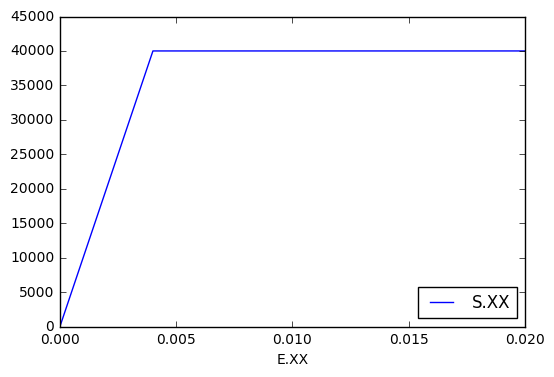

In [3]:
mps1 = MaterialPointSimulator('uplastic')
mps1.material = NonhardeningPlasticMaterial(E=10e6, Nu=.333, Y=40e3)
mps1.run_step('ESS', (.02, 0, 0), frames=50)

exx = mps1.get('E.XX')
sxx = mps1.get('S.XX')
i = where((exx > 0.) & (exx < .005))
E = sxx.iloc[i] / exx.iloc[i]
assert allclose(E.iloc[0], 10e6, atol=1e-3, rtol=1e-3)
assert amax(sxx) - 40e3 < 1e-6
mps1.df.plot('E.XX', 'S.XX')